<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_04_Pandas Pivot Tables.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [82]:
!pip install -U datasets
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

## 🟩 Count Job Postings by Title and Country (2.4.1)

In [83]:
job_values = df.pivot_table(index='job_country',columns='job_title_short',values='company_name',aggfunc='count')
job_values

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,4.0,NaN,9.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
Albania,11.0,1.0,36.0,30.0,12.0,4.0,2.0,6.0,11.0,6.0
Algeria,21.0,5.0,22.0,21.0,27.0,2.0,NaN,1.0,NaN,12.0
Angola,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0
Argentina,453.0,322.0,1273.0,2265.0,1617.0,287.0,255.0,647.0,350.0,1267.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.0,2.0,16.0,19.0,9.0,4.0,4.0,4.0,3.0,6.0
Vietnam,91.0,70.0,334.0,768.0,375.0,115.0,71.0,220.0,91.0,279.0
Yemen,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


In [84]:
job_values.fillna(0)

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,4.0,0.0,9.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
Albania,11.0,1.0,36.0,30.0,12.0,4.0,2.0,6.0,11.0,6.0
Algeria,21.0,5.0,22.0,21.0,27.0,2.0,0.0,1.0,0.0,12.0
Angola,1.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0
Argentina,453.0,322.0,1273.0,2265.0,1617.0,287.0,255.0,647.0,350.0,1267.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.0,2.0,16.0,19.0,9.0,4.0,4.0,4.0,3.0,6.0
Vietnam,91.0,70.0,334.0,768.0,375.0,115.0,71.0,220.0,91.0,279.0
Yemen,3.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
job_values.drop(0)

KeyError: '[0] not found in axis'

<Axes: xlabel='job_country'>

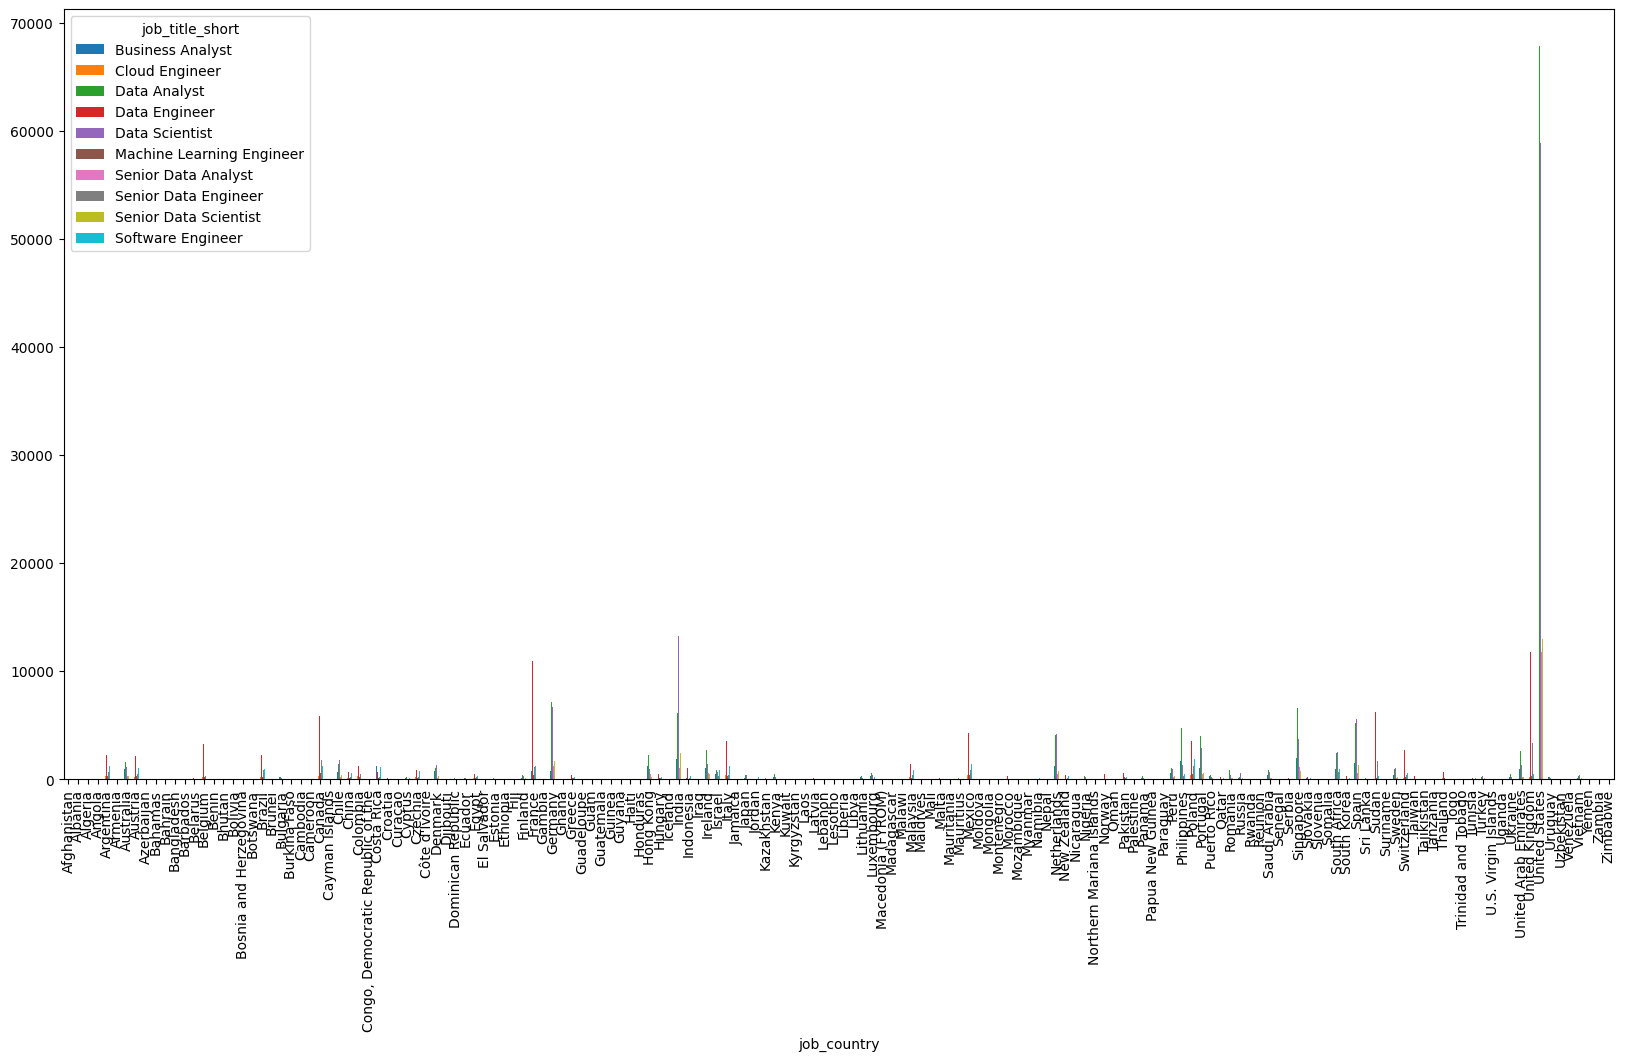

In [86]:
job_values.plot(kind='bar',figsize=(20,10))

---

## 🟨 Salary Stats by Job Title (2.4.2)

In [87]:
stats_per_job = df.pivot_table(index='job_title_short',values=['salary_hour_avg','salary_year_avg'],aggfunc='median')
stats_per_job

,salary_hour_avg,salary_year_avg
job_title_short,,
Business Analyst,40.362499,85000.0
Cloud Engineer,40.000000,90000.0
Data Analyst,32.615002,90000.0
Data Engineer,58.500000,125000.0
Data Scientist,47.500000,127500.0
Machine Learning Engineer,47.535000,106415.0
Senior Data Analyst,47.500000,111175.0
Senior Data Engineer,61.500000,147500.0
Senior Data Scientist,47.620003,155500.0


<Axes: xlabel='job_title_short'>

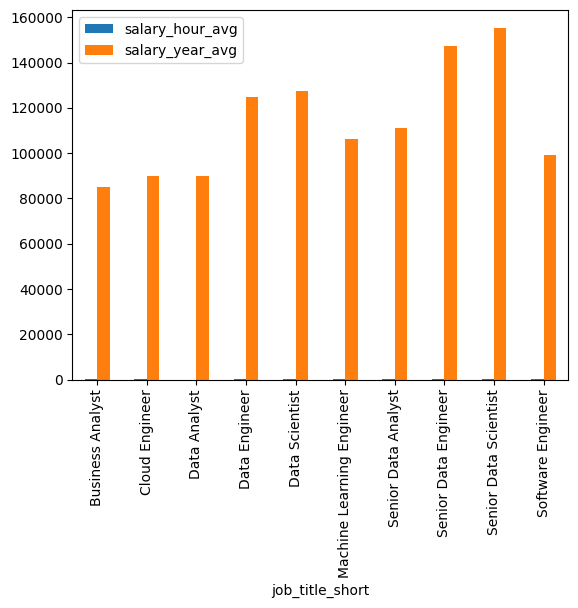

In [88]:
stats_per_job.plot(kind='bar')


---

## 🟥 Sum Salary by Title and Country (2.4.3)

In [89]:
salary_values = df.pivot_table(index='job_title_short',values=['salary_year_avg','salary_hour_avg'],aggfunc='sum')

<Axes: xlabel='job_title_short'>

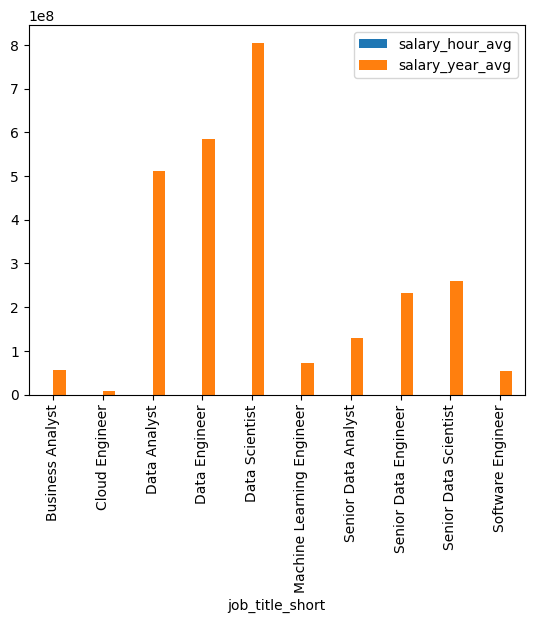

In [90]:
salary_values.plot(kind='bar')

---